In [98]:
import pandas as pd ; import numpy as np; import random as rnd ;import math
#importing data visualization packages
import seaborn as sns ; import matplotlib.pyplot as plt
%matplotlib inline
#importing machine learning packages
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.display import display, Math, Latex
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r_2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os; import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [100]:
data = pd.read_csv("https://raw.githubusercontent.com/vigneshjmurali/Statistical-Predictive-Modelling/master/Datasets/data2.csv")
#data.head(3)

## preprocessing

In [101]:
print(data.shape)
#data.dtypes

(8378, 122)


In [102]:
data["match"]=data["match"].astype('category') # Changing "Y"-Salary from Object type to Category type
data["match_category"]=data["match"].cat.codes # Assigned encoders adding new columns
data=data.select_dtypes(include=['uint8','int64','int8','float64']).copy() # Here i drop the object type to add int and uint type

In [103]:
y_data = pd.DataFrame([data.match_category]).T # TAKING THE SALARY AS THE Y VARIABLE OR TARGET
x_data = pd.DataFrame(data) # CONSIDERING ALL THE VARIABLES TO AS X VARIABLES AT FIRST
x_data = data.drop(['match_category'], axis = 1) # DROPPING THE SALARY FROM THE X VARIABLES
print (x_data.shape) ; print (y_data.shape) # PRINTING THE DIMENTION OF THE BOTH LEFTOVER "Y" & "X" VARIABLES
from sklearn.cross_validation import train_test_split # TRAINING AND TEST SPLIT CROSS VALIDATAION
xtrain_data, xtest_data, ytrain_data, ytest_data = train_test_split( 
    x_data, y_data, random_state = 1, test_size = 0.25) # THE TRAIN AND TEST SPLIT IS 75% AND 25 %
print (xtrain_data.shape) ; print (xtest_data.shape) # PRINTING ALL THE X_TRAIN, X_TEST
print (ytrain_data.shape) ; print (ytest_data.shape) # PRINTING ALL THE Y_TRAIN, Y_TEST

(8378, 117)
(8378, 1)
(6283, 117)
(2095, 117)
(6283, 1)
(2095, 1)


## K Nearest Neighbors

In [104]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(xtrain_data, ytrain_data)
#Evaluating the model on the test data set
ymodel = model.predict(xtest_data)
acc_knn1 = round(model.score(xtrain_data, ytrain_data) * 100, 2)
print ('Training accuracy = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest_data, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_knn))

Training accuracy = 100.0
Testing accuracy = 75.99


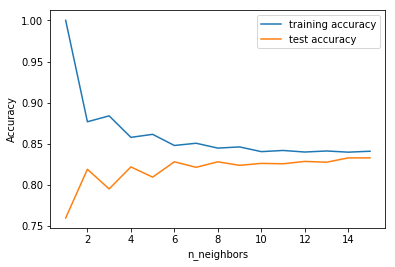

In [105]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 14
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xtrain_data, ytrain_data)
    # record training set accuracy
    training_accuracy.append(clf.score(xtrain_data, ytrain_data))
    # record generalization accuracy
    test_accuracy.append(clf.score(xtest_data, ytest_data))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [106]:
# KNeighborsClassifier is a class --> go to the source
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score
for k in [1, 3, 5, 7, 9,11,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain_data, ytrain_data) #construct the BallTree or KDTree
    y_test_pred = knn.predict(xtest_data)
    cfm = confusion_matrix(ytest_data, y_test_pred)
    #print('KNN confusion matrix for test set\n', cfm)
    mean_acc = knn.score(xtest_data, ytest_data)
    print('mean accuracy of {} nearest neighbor(s) is {} '.format(k, round(mean_acc, 4)))

mean accuracy of 1 nearest neighbor(s) is 0.7599 
mean accuracy of 3 nearest neighbor(s) is 0.7952 
mean accuracy of 5 nearest neighbor(s) is 0.8095 
mean accuracy of 7 nearest neighbor(s) is 0.8215 
mean accuracy of 9 nearest neighbor(s) is 0.8239 
mean accuracy of 11 nearest neighbor(s) is 0.8258 
mean accuracy of 15 nearest neighbor(s) is 0.8329 
mean accuracy of 17 nearest neighbor(s) is 0.8339 
mean accuracy of 19 nearest neighbor(s) is 0.8315 
mean accuracy of 21 nearest neighbor(s) is 0.831 


In [107]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, xtest_data, ytest_data, cv=5, scoring = 'precision_macro')
    #print(scores)
    print("k: %d. Recall: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std()))

k: 1. Recall: 0.54 (+/- 0.03)
k: 3. Recall: 0.57 (+/- 0.05)
k: 5. Recall: 0.54 (+/- 0.04)
k: 7. Recall: 0.51 (+/- 0.06)
k: 9. Recall: 0.49 (+/- 0.07)


## Naive Bayes

In [108]:
model = GaussianNB()
model.fit(xtrain_data, ytrain_data)
ymodel = model.predict(xtest_data)
#The training score is reported 79.2%.
acc_gauss1 = round(model.score(xtrain_data, ytrain_data) * 100, 2)
print ('Training accuracy = {}'.format(acc_gauss1))
acc_gauss = round(accuracy_score(ytest_data, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_gauss))
#get area under roc curve from model used above
roc_auc_score(ytest_data, ymodel)

Training accuracy = 97.98
Testing accuracy = 98.14


0.9441260744985673

## Logistic Regression

In [109]:
logreg = LogisticRegression().fit(xtrain_data, ytrain_data)
y_model_log = logreg.predict(xtest_data)
print("Training set score: {:.3f}".format(logreg.score(xtrain_data, ytrain_data)))
print("Test set score: {:.3f}".format(logreg.score(xtest_data, ytest_data)))
#get area under roc curve from model used above
roc_auc_score(ytest_data, y_model_log)

Training set score: 1.000
Test set score: 1.000


1.0

In [110]:
rs = 0
logitR = LogisticRegression(random_state = rs)

param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(estimator = logitR, cv = 3, param_grid = param_grid , scoring = 'accuracy', verbose = 1)
clf.fit(xtrain_data, ytrain_data)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   19.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [111]:
# 2. Parameters and methods in GridSearchCV class
# 2.1 parameters
clf.cv_results_  # output the results (average and all folds)
print('mean test scores: ', clf.cv_results_['mean_test_score']) # average test score on all folds
print('best score: ', clf.best_score_)
print('best  parameters: ', clf.best_params_)
print('best  parameters: ', clf.scorer_)
# 2.2 methods of class GridSearchCV
# fit(X,y) # train models for all combinations of parameters using k-fold cross-validation
# predict(X,y) # use the model with the best found parameter

mean test scores:  [0.86582843 0.83590641 0.93554035 0.99729429 0.99761261 0.99968168
 0.99952252 0.99984084 0.99968168 1.         0.99968168 1.
 0.99968168 1.        ]
best score:  1.0
best  parameters:  {'C': 10, 'penalty': 'l1'}
best  parameters:  make_scorer(accuracy_score)


In [112]:
def show_metrics(cm):
    '''This function calculates the accuracy, precision, recall ratio and F1 score using the 
    confusion matrix of a two-class problems.
    Malignant tumors and benign tumors are negative

    :param cm: 2*2 confision matrix 
    '''    

    tp = cm[1,1] #true postive (true label)1-->1(prediction)
    fn = cm[1,0] #false negative 1-->0
    fp = cm[0,1] #false positive 0-->1
    tn = cm[0,0] #true negative  0-->0
    
    precision = tp/(tp+fp)
    recallR = tp/(tp+fn)
    acc = (tp+tn)/(tp+tn+fp+fn)
    print('Accuracy  =    {:.3f}'.format(acc))
    print('Precision =    {:.3f}'.format(precision))
    print('Recall ratio = {:.3f}'.format(recallR))
    print('F1_score =    {:.3f}'.format(2*(recallR * precision)/(recallR + precision)))

In [113]:
best_ps =clf.best_params_
best_clf = LogisticRegression(C = best_ps['C'], 
                                penalty = best_ps['penalty'], 
                                random_state = rs)
best_clf.fit(xtrain_data, ytrain_data)
y_test_pred = best_clf.predict(xtest_data)
cm = confusion_matrix(ytest_data, y_test_pred)
print(cm)
show_metrics(cm)

[[1746    0]
 [   0  349]]
Accuracy  =    1.000
Precision =    1.000
Recall ratio = 1.000
F1_score =    1.000


In [114]:
logreg001 = LogisticRegression(C=0.01).fit(xtrain_data, ytrain_data)
y_model_log_001 = logreg.predict(xtest_data)
print("Training set score: {:.3f}".format(logreg001.score(xtrain_data, ytrain_data)))
print("Test set score: {:.3f}".format(logreg001.score(xtest_data, ytest_data)))
#get area under roc curve from model used above
roc_auc_score(ytest_data, y_model_log_001)

Training set score: 0.963
Test set score: 0.958


1.0

## Decision Tree

In [115]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(xtrain_data, ytrain_data)
y_model_dectree = tree.predict(xtest_data)
print("Accuracy on training set: {:.3f}".format(tree.score(xtrain_data, ytrain_data)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest_data, ytest_data)))
#get area under roc curve from model used above
roc_auc_score(ytest_data, y_model_dectree)

Accuracy on training set: 1.000
Accuracy on test set: 1.000


1.0

In [116]:
# Evaluation function
def regression_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print('MSE Train: ', round(mse(y_train, y_train_pred), 3))
    print('MSE Test: ', round(mse(y_test, y_test_pred), 3))

    print('R^2 Train: ', round(r_2(y_train, y_train_pred), 3))
    print('R^2 Test: ', round(r_2(y_test, y_test_pred), 3))

# OLS: ordinary least squares
slr = LinearRegression()
slr.fit(xtrain_data, ytrain_data)
y_train_pred = slr.predict(xtrain_data)
y_test_pred = slr.predict(xtest_data)

print('Results of the OLS:')
regression_metrics(ytrain_data, y_train_pred, ytest_data, y_test_pred)

Results of the OLS:
MSE Train:  0.056
MSE Test:  0.059
R^2 Train:  0.591
R^2 Test:  0.578


## Random Forest

In [117]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(xtrain_data, ytrain_data)
y_model_randomfor = forest.predict(xtest_data)
print("Accuracy on training set: {:.3f}".format(forest.score(xtrain_data, ytrain_data)))
print("Accuracy on test set: {:.3f}".format(forest.score(xtest_data, ytest_data)))
roc_auc_score(ytest_data, y_model_randomfor)

Accuracy on training set: 1.000
Accuracy on test set: 0.994


0.9828080229226361

## Support Vector Machine (SVM)

In [118]:
svc = SVC(C=1000)
svc.fit(xtrain_data, ytrain_data)
print("Accuracy on training set: {:.2f}".format(svc.score(xtrain_data, ytrain_data)))
print("Accuracy on test set: {:.2f}".format(svc.score(xtest_data, ytest_data)))

Accuracy on training set: 1.00
Accuracy on test set: 0.83


In [119]:
y_test_pred = clf.predict(xtest_data)
cm = confusion_matrix(ytest_data, y_test_pred)
print('Confusion matrix:\n', cm)
show_metrics(cm)
roc_auc_score(ytest_data,y_test_pred)

Confusion matrix:
 [[1746    0]
 [   0  349]]
Accuracy  =    1.000
Precision =    1.000
Recall ratio = 1.000
F1_score =    1.000


1.0

 ## Neural Networks

In [120]:
mlp = MLPClassifier(random_state=42)
mlp.fit(xtrain_data, ytrain_data)
y_model_NN = mlp.predict(xtest_data)
print("Accuracy on training set: {:.2f}".format(mlp.score(xtrain_data, ytrain_data)))
print("Accuracy on test set: {:.2f}".format(mlp.score(xtest_data, ytest_data)))
roc_auc_score(ytest_data, y_model_NN)

Accuracy on training set: 0.82
Accuracy on test set: 0.81


0.8172482661966609